<a href="https://colab.research.google.com/github/AryanSingh2005123/Personality-Prediction/blob/main/Personality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:

mbti_df=pd.read_csv('/content/mbti_1.csv')

In [30]:
length = len(mbti_df)
print("Length of dataset:", length)

Length of dataset: 8675


In [4]:
mbti_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [5]:
mbti_df.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [6]:
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


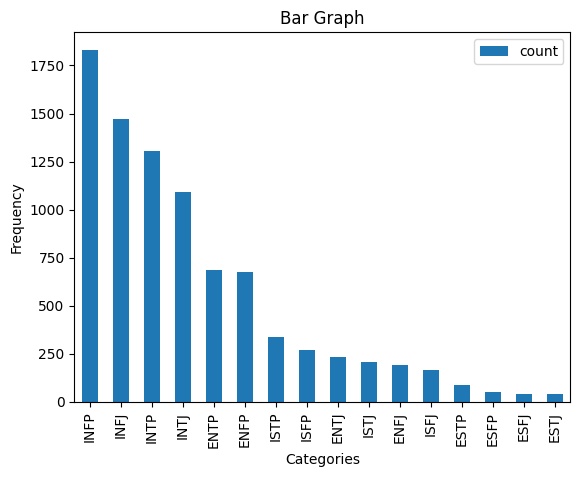

In [7]:
pd.DataFrame(mbti_df.type.value_counts()).plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Categories')
plt.title('Bar Graph')
plt.show()

<ipython-input-8-a51b06237305>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mbti_df["posts"].apply(lambda x: len(x)))


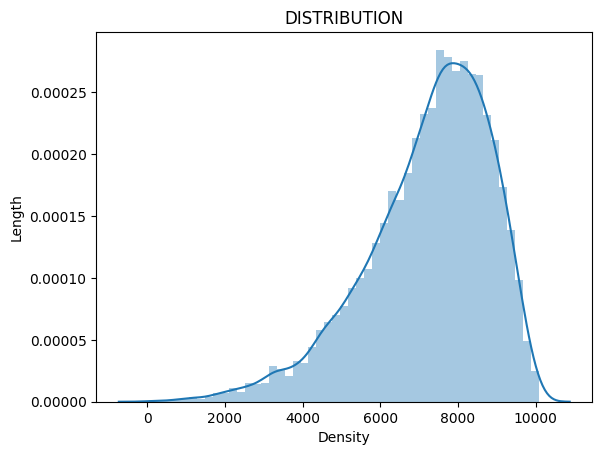

In [8]:
sns.distplot(mbti_df["posts"].apply(lambda x: len(x)))
plt.ylabel('Length')
plt.xlabel('Density')
plt.title('DISTRIBUTION')
plt.show()

In [9]:
#LOWERCASE
mbti_df["posts"] = mbti_df["posts"].str.lower()

In [10]:
for i in range(len(mbti_df)):
  post_temp=mbti_df._get_value(i, 'posts')
  pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')
  post_temp= re.sub(pattern, ' ', post_temp)
  mbti_df._set_value(i, 'posts',post_temp)

In [11]:
for i in range(len(mbti_df)):
  post_temp=mbti_df._get_value(i, 'posts')
  pattern=re.compile(r'[0-9]')  #deals with number
  post_temp=re.sub(pattern, ' ',post_temp )
  pattern = re.compile('\W+')   #convert everything except words and spaces
  post_temp= re.sub(pattern, ' ', post_temp)
  pattern = re.compile(r'[_+]') #conver + and _ sign
  post_temp= re.sub(pattern, ' ', post_temp)
  mbti_df._set_value(i, 'posts',post_temp)

In [12]:
for i in range(len(mbti_df)):
  post_temp=mbti_df._get_value(i, 'posts')
  pattern = re.compile('\s+') #if 1 or more white spaces
  post_temp= re.sub(pattern, ' ', post_temp)
  mbti_df._set_value(i, 'posts', post_temp)


In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
remove_words = stopwords.words("english")
for i in range(mbti_df.shape[0]):
  post_temp=mbti_df._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])    #to remove stopwords
  mbti_df._set_value(i, 'posts', post_temp)

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
for i in range(mbti_df.shape[0]):
    post_temp = mbti_df._get_value(i, 'posts')
    if isinstance(post_temp, list):  # Convert list to string
        post_temp = " ".join(post_temp)
    post_temp = " ".join([lemmatizer.lemmatize(w) for w in post_temp.split()])
    mbti_df._set_value(i, 'posts', post_temp)


In [20]:
print(mbti_df)

      type                                              posts
0     INFJ  enfp intj moment sportscenter top ten play pra...
1     ENTP  finding lack post alarming sex boring position...
2     INTP  good one course say know blessing curse absolu...
3     INTJ  dear intp enjoyed conversation day esoteric ga...
4     ENTJ  fired another silly misconception approaching ...
...    ...                                                ...
8670  ISFP  ixfp always think cat fi doms reason especiall...
8671  ENFP  thread already exists someplace else post heck...
8672  INTP  many question thing would take purple pill pic...
8673  INFP  conflicted right come wanting child honestly m...
8674  INFP  long since personalitycafe although seem chang...

[8675 rows x 2 columns]


In [21]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(mbti_df,test_size=0.2,random_state=45,stratify=mbti_df.type)



In [22]:
print(train_data)

      type                                              posts
1308  ENTP  approaching would serial killer perspective gu...
4562  INFJ  suffered bdd around year even though therapy s...
122   INFJ  ahx story life tendency sound like know feel e...
6099  INFP  literal figurative inquiring mind want know bi...
91    INTP  software development job terrible support rela...
...    ...                                                ...
1461  ENTP  think grace balanced esfp ever seen absolutely...
4986  INFP  realized little picture next nfs forum home pa...
249   ISFP  married istj get really well rather introverte...
2735  INFP  human could never relate someone like someone ...
5695  INTP  pretty good summary write sensing spot feeling...

[6940 rows x 2 columns]


In [23]:
print(test_data)

      type                                              posts
5550  INTP  opinion give pretty song introverted sensor vi...
7853  ENTJ  several estjs circle active reader enjoy ficti...
3141  INTP  entp currently relationship infp going quite w...
932   INFJ  get pretty obvious lifestyle difference ne qui...
2589  ISFJ  maker survivor air quiet john james audubon ro...
...    ...                                                ...
5028  INTP  hi see also new nice fitting well native langu...
5637  INFP  hope go well good luck happy happy happy well ...
6795  INFJ  search infjs awesome fb closed group community...
8304  ENTJ  went towards gardening redecorating home photo...
5114  INFP  saw today amazing pretty couldnt see total sol...

[1735 rows x 2 columns]


In [24]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english')
vectorizer.fit(train_data.posts)
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [25]:
from sklearn.preprocessing import LabelEncoder
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [26]:
from sklearn.svm import SVC

In [28]:
model_svc=SVC(kernel="linear")
model_svc.fit(train_post,train_target)
pred_svc=model_svc.predict(test_post)

In [32]:
pred_training_svc=model_svc.predict(train_post)

In [33]:
print("The train accuracy score for model trained on Support Classifier is:",accuracy_score(train_target,pred_training_svc))


The train accuracy score for model trained on Support Classifier is: 0.8910662824207493


In [34]:
print("The test accuracy score for model trained on Support Vector classifier is:",accuracy_score(test_target,pred_svc))

The test accuracy score for model trained on Support Vector classifier is: 0.6685878962536023


In [35]:
from sklearn.metrics import classification_report
personality_types=target_encoder.inverse_transform([i for i in range(16)])
print('Test classification report of Support Vector Machine\n',classification_report(test_target,model_svc.predict(test_post),target_names=personality_types))


Test classification report of Support Vector Machine
               precision    recall  f1-score   support

        ENFJ       0.56      0.26      0.36        38
        ENFP       0.66      0.55      0.60       135
        ENTJ       0.66      0.41      0.51        46
        ENTP       0.61      0.59      0.60       137
        ESFJ       0.80      0.44      0.57         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.67      0.25      0.36         8
        ESTP       0.62      0.28      0.38        18
        INFJ       0.69      0.73      0.71       294
        INFP       0.65      0.83      0.73       366
        INTJ       0.70      0.66      0.68       218
        INTP       0.66      0.79      0.72       261
        ISFJ       0.85      0.52      0.64        33
        ISFP       0.62      0.37      0.47        54
        ISTJ       0.67      0.34      0.45        41
        ISTP       0.79      0.66      0.72        67

    accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
